In [1]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Automatically created module for IPython interactive environment


In [2]:
np.random.seed(0)
X = np.random.randn(500, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [3]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [4]:
# fit the model
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [5]:
class_names = np.array(['0','1'])

<Figure size 432x288 with 0 Axes>

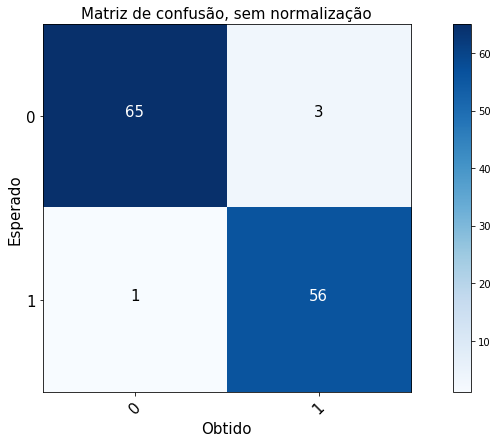

In [6]:
import  itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão sobre diabetes',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,fontsize=15, rotation=45)
    plt.yticks(tick_marks, classes,fontsize=15)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",fontsize=15,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Esperado',fontsize=15)
    plt.xlabel('Obtido',fontsize=15)
# Matriz de confusão

cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
# Sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusão, sem normalização')




<Figure size 432x288 with 0 Axes>

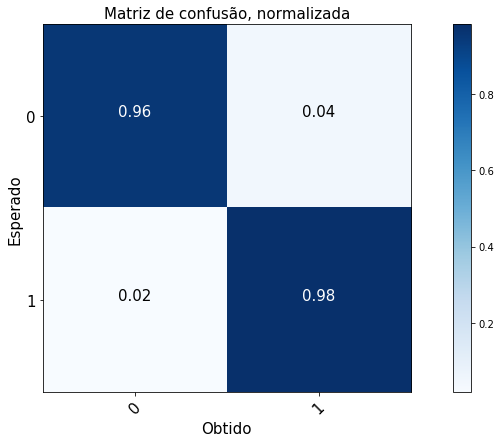

In [7]:
# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Matriz de confusão, normalizada')

In [8]:
print(classification_report(y_test, y_pred, target_names=class_names))

             precision    recall  f1-score   support

          0       0.98      0.96      0.97        68
          1       0.95      0.98      0.97        57

avg / total       0.97      0.97      0.97       125



In [9]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 1000),
                     np.linspace(-3, 3, 1000))

/home/jonnatas/.local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


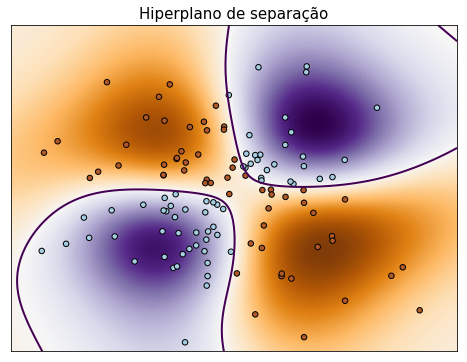

In [10]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X_test[:, 0], X_test[:, 1], s=30, c=y_pred, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.title('Hiperplano de separação',fontsize=15)
plt.show() 